# IPL Match Visual Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ipl = pd.read_csv(r'Ipl-2022.csv')

In [3]:
ipl.head()

,Unnamed: 0,Players,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Old Team,Team,COST IN $ (000)
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarath Titans,NaN
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarath Titans,NaN
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarath Titans,NaN
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarath Titans,NaN
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarath Titans,NaN


In [4]:
ipl.isnull().sum()

Unnamed: 0           0
Players              0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    395
Cost IN $ (000)    395
Old Team           436
Team                 0
COST IN $ (000)    635
dtype: int64

In [5]:
ipl[ipl['Cost IN $ (000)'].isnull()]

,Unnamed: 0,Players,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Old Team,Team,COST IN $ (000)
240,240,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold,NaN
241,241,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold,NaN
242,242,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold,NaN
243,243,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold,NaN
244,244,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold,NaN
...,...,...,...,...,...,...,...,...,...
630,631,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold,NaN
631,632,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,NaN
632,633,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,NaN
633,634,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold,NaN


In [6]:
ipl['Cost IN $ (000)']= ipl['Cost IN $ (000)'].fillna(0)
ipl['COST IN ₹ (CR.)']= ipl['COST IN ₹ (CR.)'].fillna(0)
ipl['COST IN $ (000)']= ipl['COST IN $ (000)'].fillna(0)

In [7]:
ipl.isnull().sum()

Unnamed: 0           0
Players              0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)      0
Cost IN $ (000)      0
Old Team           436
Team                 0
COST IN $ (000)      0
dtype: int64

In [8]:
ipl[ipl['Old Team'].isnull()]

,Unnamed: 0,Players,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Old Team,Team,COST IN $ (000)
6,6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarath Titans,0.0
9,9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarath Titans,0.0
10,10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarath Titans,0.0
11,11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarath Titans,0.0
17,17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarath Titans,0.0
...,...,...,...,...,...,...,...,...,...
630,631,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold,0.0
631,632,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold,0.0
632,633,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold,0.0
633,634,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold,0.0


In [9]:
ipl['Old Team']=ipl['Old Team'].fillna('not participated')

In [10]:
ipl.isnull().sum()

Unnamed: 0         0
Players            0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
Old Team           0
Team               0
COST IN $ (000)    0
dtype: int64

In [11]:
teams = ipl[ipl['COST IN ₹ (CR.)']>0]['Team'].unique()

In [12]:
teams

array(['Gujarath Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Gaints',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [13]:
ipl['Status']= ipl['Team'].replace(teams,'sold')

In [14]:
ipl

,Unnamed: 0,Players,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Old Team,Team,COST IN $ (000),Status
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarath Titans,0.0,sold
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarath Titans,0.0,sold
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarath Titans,0.0,sold
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarath Titans,0.0,sold
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarath Titans,0.0,sold
...,...,...,...,...,...,...,...,...,...,...
630,631,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,not participated,Unsold,0.0,Unsold
631,632,Monu Singh,20 Lakh,BOWLER,0.0,0.0,not participated,Unsold,0.0,Unsold
632,633,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,not participated,Unsold,0.0,Unsold
633,634,Lance Morris,20 Lakh,BOWLER,0.0,0.0,not participated,Unsold,0.0,Unsold


In [15]:
ipl[ipl['Players'].duplicated(keep=False)]

,Unnamed: 0,Players,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Old Team,Team,COST IN $ (000),Status
62,62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,0.0,sold
96,96,Mayank Agarwal,Retained,BATTER,12.00,1560.0,PBKS,Punjab Kings,0.0,sold
97,97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings,0.0,sold
98,98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings,0.0,sold
99,99,Shahrukh Khan,40 Lakh,ALL-ROUNDER,9.00,1170.0,PBKS,Punjab Kings,0.0,sold
100,100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings,0.0,sold
101,101,Jonny Bairstow,1.5 Cr,WICKETKEEPER,6.75,877.5,SRH,Punjab Kings,0.0,sold
102,102,Odean Smith,1 Cr,ALL-ROUNDER,6.00,780.0,not participated,Punjab Kings,0.0,sold
103,103,Rahul Chahar,75 Lakh,BOWLER,5.25,682.5,MI,Punjab Kings,0.0,sold
104,104,Arshdeep Singh,Retained,BOWLER,4.00,520.0,PBKS,Punjab Kings,0.0,sold


## How many players participated in IPL 2022 Auction 

In [16]:
ipl['Players'].shape

(635,)

## How many types of Players participated in IPL 2022 Auction

In [17]:
types=ipl['TYPE'].value_counts()

In [18]:
types

ALL-ROUNDER     243
BOWLER          215
BATTER          112
WICKETKEEPER     65
Name: TYPE, dtype: int64

### Describing by via PieChat

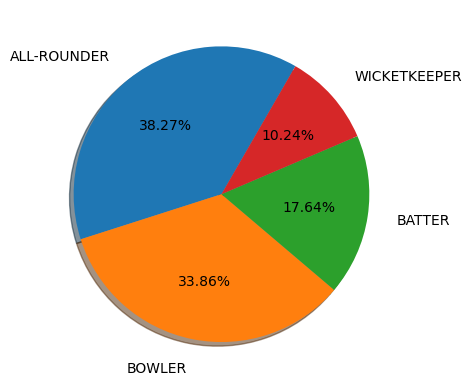

In [19]:
plt.pie(types.values,labels=types.index,labeldistance=1.2,autopct= '%1.2f%%',shadow = True,startangle=60)
plt.show()

In [20]:
import seaborn as sns

/Users/adityabele703/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


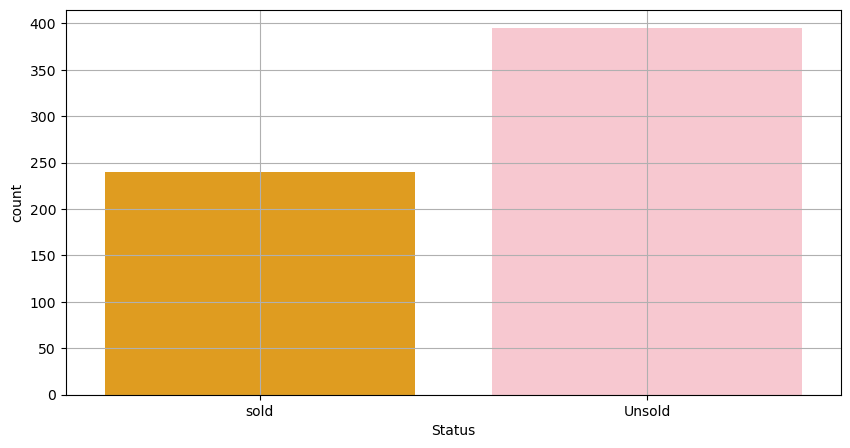

In [25]:
plt.figure(figsize=(10,5))
fig=sns.countplot(ipl['Status'],palette=['Orange','pink'])
plt.xlabel=('Sold or Unsold')
plt.ylabel=('participate')
plt.title=('Player Sold unsold')
plt.grid()

In [24]:
ipl.groupby('Status')['Players'].count()

Status
Unsold    395
sold      240
Name: Players, dtype: int64

## Total Number of players taken by each Teams

/Users/adityabele703/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


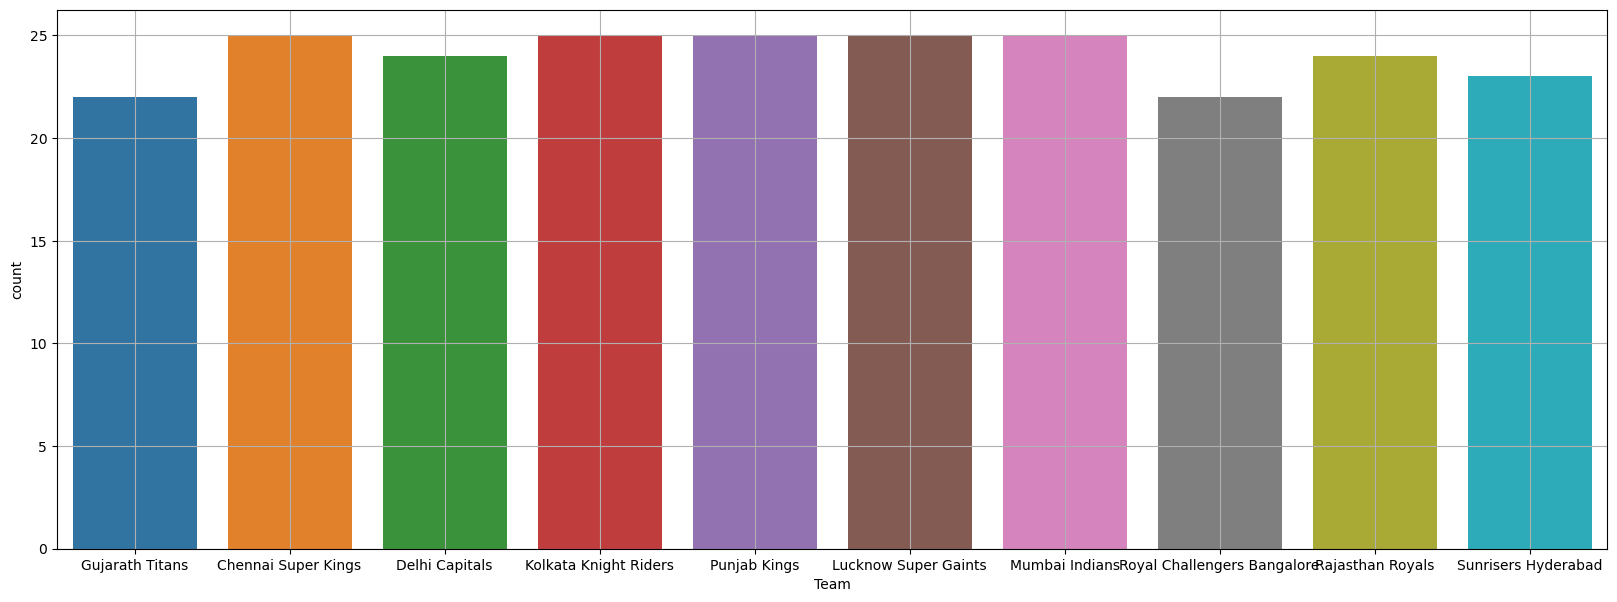

In [34]:
plt.figure(figsize=(20,7))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'])
plt.grid()

In [36]:
ipl.groupby('Team')['Players'].count()

Team
Chennai Super Kings             25
Delhi Capitals                  24
Gujarath Titans                 22
Kolkata Knight Riders           25
Lucknow Super Gaints            25
Mumbai Indians                  25
Punjab Kings                    25
Rajasthan Royals                24
Royal Challengers Bangalore     22
Sunrisers Hyderabad             23
Unsold                         395
Name: Players, dtype: int64

## Type of Players taken by each Teams

/Users/adityabele703/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


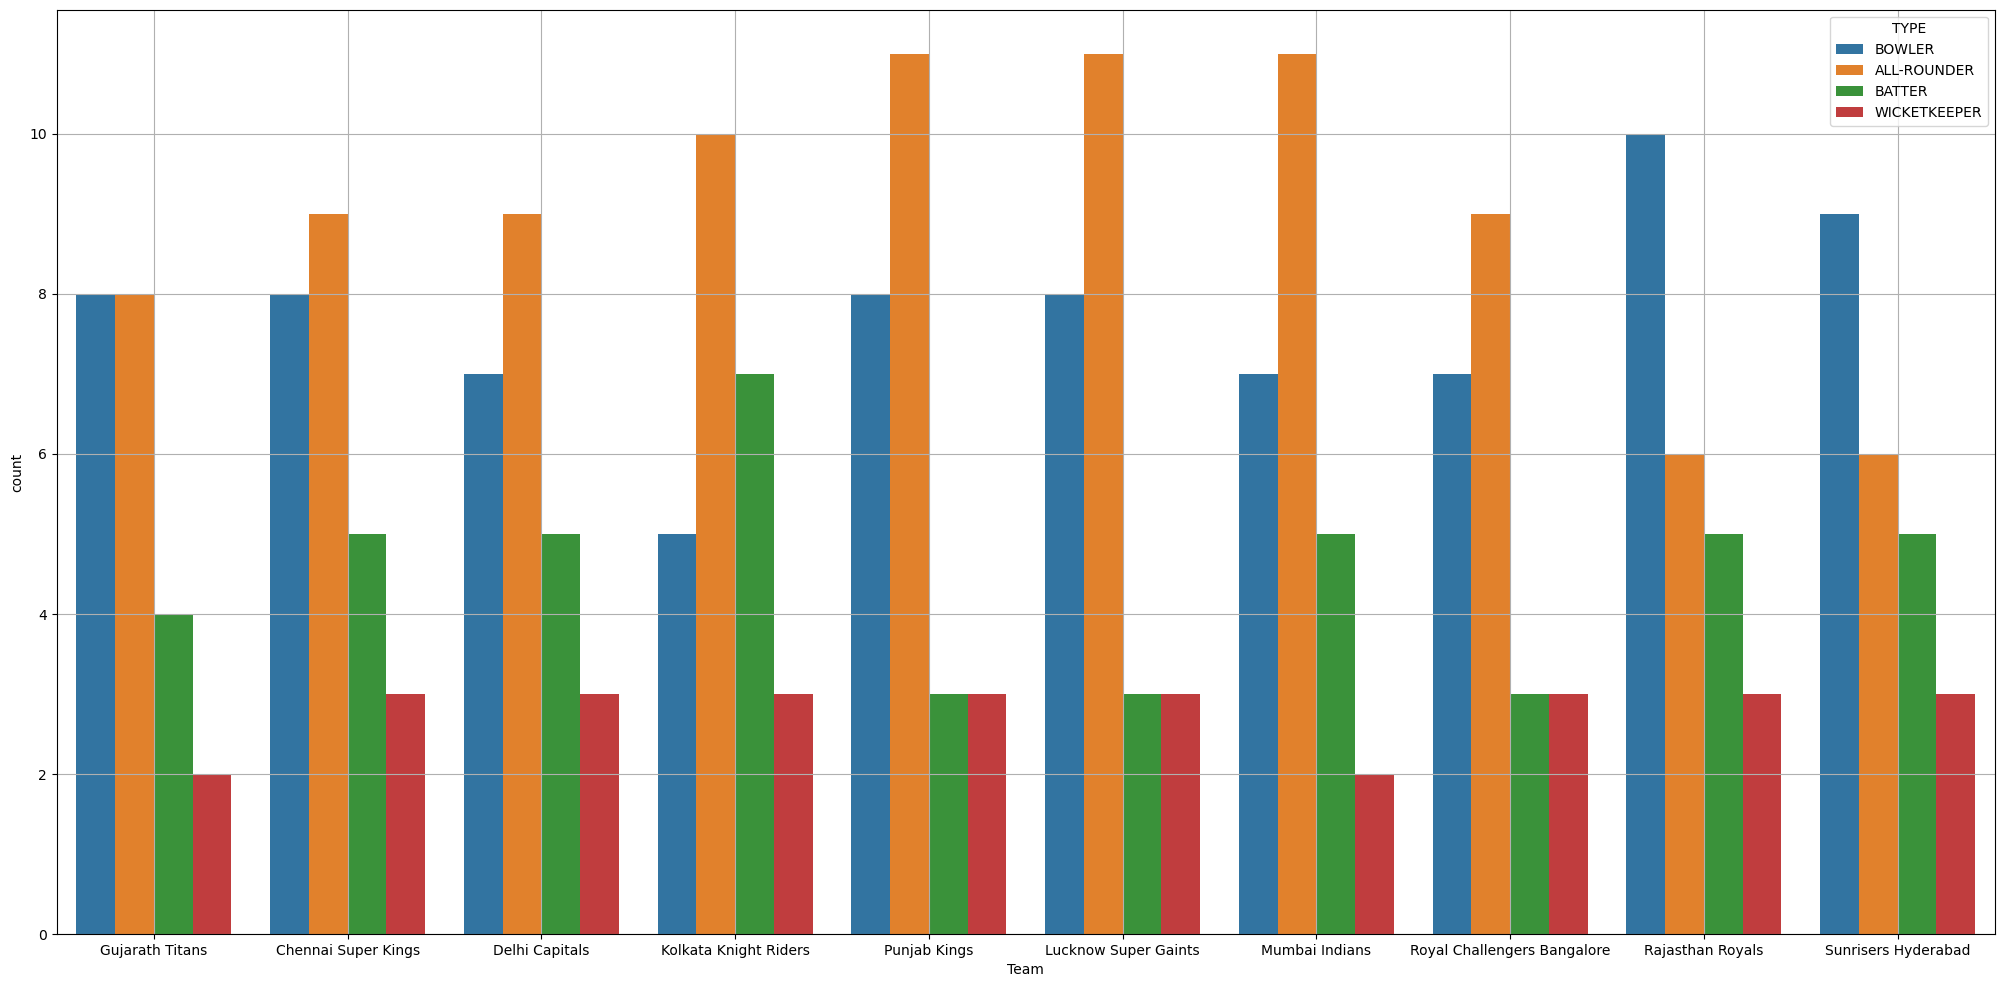

In [43]:
plt.figure(figsize=(25,12))
fig=sns.countplot(ipl[ipl['Team']!='Unsold']['Team'],hue=ipl['TYPE'])
plt.grid()